In [26]:
import numpy as np
import matplotlib.pyplot as plt

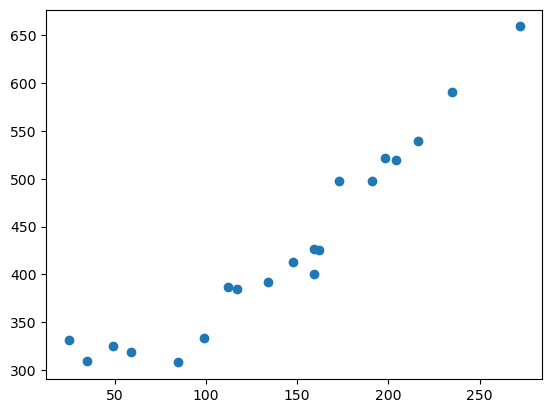

In [27]:
# 读取数据
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

plt.plot(train_x, train_y, 'o')
plt.show()

In [28]:
# 数据标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma
train_x_std = standardize(train_x)

# 训练数据矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x**2]).T
X = to_matrix(train_x_std)
print("训练数据：")
print(X)

# 回归函数
theta = np.random.rand(3)
def f(x):
    return np.dot(x, theta)

print("theta = ", theta)

# 误差函数
def E(x, y):
    return 0.5 * np.sum((f(x) - y) ** 2)

# 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

训练数据：
[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]
theta =  [0.968474   0.54917288 0.20861627]


第1次, theta = [9.5279322  2.40805417 9.17659083], 差值 = 153113.0506
第2次, theta = [17.73684174  4.24219804 17.58523373], 差值 = 137848.6695
第3次, theta = [25.61340023  6.05132336 25.46589087], 差值 = 124190.1568
第4次, theta = [33.17481441  7.83519807 32.84817811], 差值 = 111966.4422
第5次, theta = [40.43735455  9.59363586 39.76007653], 差值 = 101024.7400
第6次, theta = [47.41640593 11.32649296 46.22802245], 差值 = 91228.5927
第7次, theta = [54.12651737 13.03366514 52.2769925 ], 差值 = 82456.1240
第8次, theta = [60.58144717 14.71508489 57.930584  ], 差值 = 74598.4791
第9次, theta = [66.79420654 16.3707188  63.21109091], 差值 = 67558.4316
第10次, theta = [72.7771006  18.00056506 68.13957558], 差值 = 61249.1394
第11次, theta = [78.54176707 19.6046511  72.73593664], 差值 = 55593.0342
第12次, theta = [84.099213   21.18303141 77.01897303], 差值 = 50520.8294
第13次, theta = [89.45984928 22.73578546 81.00644458], 差值 = 45970.6343
第14次, theta = [94.6335234  24.26301578 84.71512925], 差值 = 41887.1635
第15次, theta = [99.62955035 25.76484612 88

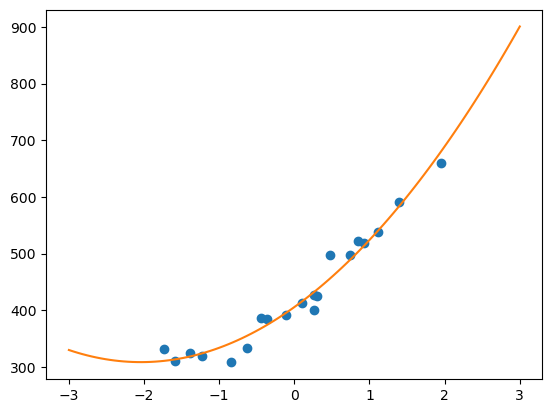

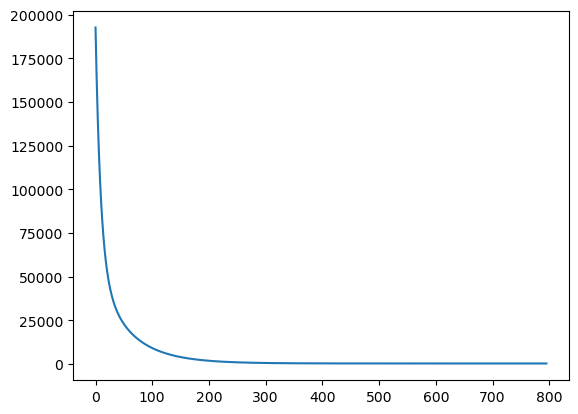

In [29]:
# 求theta
diff = 1
ETA = 1e-3
error = E(X, train_y)
errors = [MSE(X, train_y)]
count  = 0

while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    error_current = E(X, train_y)
    diff = error - error_current
    error = error_current
    errors.append(MSE(X, train_y))
    count += 1
    log = '第{}次, theta = {}, 差值 = {:.4f}'
    print(log.format(count, theta, diff))

axis_x = np.linspace(-3, 3, 100)
plt.plot(train_x_std, train_y, 'o')
plt.plot(axis_x, f(to_matrix(axis_x)))
plt.show()

axis_x2 = np.arange(len(errors))
plt.plot(axis_x2, errors)
plt.show()